After running my notebook few times to make the code .. it shows me this message
(Your session crashed after using all available RAM. If you are interested in access to high-RAM runtimes, you may want to check out Colab Pro.) durning making the fitting cell

**CNN**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical


In [ ]:
from tensorflow.keras.datasets import cifar10

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [ ]:
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


In [ ]:
target_size = (64, 64)
x_train = np.array([cv2.resize(img, target_size) for img in x_train])
x_test = np.array([cv2.resize(img, target_size) for img in x_test])


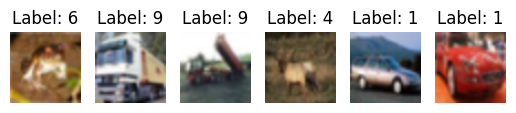

In [ ]:
# Display a few images from the dataset
num_images_to_display = 6

for i in range(num_images_to_display):
    plt.subplot(1, num_images_to_display, i + 1)
    plt.imshow(x_train[i])
    plt.title(f"Label: {y_train[i][0]}")
    plt.axis('off')

plt.show()

In [ ]:
x_train = x_train / 255
x_test = x_test / 255

In [ ]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [ ]:
model = Sequential([
    layers.Conv2D(16, 3, padding='same', activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])


In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])



In [ ]:
model.fit(x_train, y_train ,epochs=10,validation_data=(x_test, y_test))

In [ ]:
model.evaluate(x_test,y_test)

**Improve Accuracy by making Data augmentation and dropout layers and increase training epochs**

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
data_augmentation = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=False
)


In [ ]:
model =Sequential([
    layers.Conv2D(16, 3, padding='same', activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D(),
    layers.Dropout(0.25),  # Adding dropout
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.25),  # Adding dropout
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.25),  # Adding dropout
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),   # Adding dropout
    layers.Dense(10, activation='softmax')
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])



In [ ]:
history = model.fit(data_augmentation.flow(x_train, y_train, batch_size=32),
                    epochs=20,
                    validation_data=(x_test, y_test))

In [ ]:
model.evaluate(x_test,y_test)